In [1]:
import sys; sys.path.append("..")
from importlib import reload
import utils.main_experiments as tbr; reload(tbr)
import utils.evaluate as eval_utils; reload(eval_utils)
import data.online_dataset as dld; reload(dld)
import numpy as np
import pandas as pd
import scipy.stats

import matplotlib.pyplot as plt
%matplotlib inline


DATASETS = ['Load'] #+ [ 'COVID', 'MIMIC', 'claim', 'Load-R', 'EEG']
NSEEDS = 2
KEEP_TAIL_T = 20 #or None

MAX_Ts = {dataset: dld.get_horizon(dataset) for dataset in DATASETS}
N_TAILS = {dataset: int(np.ceil(0.1 * dld.get_default_ntest(dataset))) for dataset in DATASETS}
_correct_alpha = lambda x: (x.replace("-Bon", ""), '-Bon' in x)
DATASETS_MAP = {_: r"\data{}".format(_).replace("-", "") for _ in DATASETS}
DISPLAY_DATASETS_MAP = {"MIMIC": "MIMIC", "COVID":"COVID", "EEG":"EEG", "Load":"Load", "Load-R": "Load-R", 'claim': "CLAIM"}
METHODS = ['CPTD-R', "CPTD-M"] + ['CFRNN'] + ['CQRNN', 'LASplit'] + ['QRNN', 'DPRNN']# + ['CFRNN-Bon']
METHOD_MAP = {m:m for m in METHODS}

NON_CONFORMALS = ['QRNN', 'DPRNN']

In [2]:
from collections import defaultdict
ws, covs, cov_granular, ws2, covs2, cov_granular2 = [defaultdict(dict) for _ in range(6)]
for dataset in DATASETS:
    min_t = 0 if KEEP_TAIL_T is None else (MAX_Ts[dataset] - KEEP_TAIL_T)
    assert min_t >= 0
    pred_kwargs={"update_cal": True} if dataset == 'Load' else {}
    
    for method in METHODS:
        base_method, correct_alpha = _correct_alpha(method)
        ws[dataset][method], covs[dataset][method], cov_granular[dataset][method] = tbr.summ_results(base_method, dataset, seeds=range(NSEEDS), correct_alpha=correct_alpha, min_t=min_t, pred_kwargs=pred_kwargs, summ_by_T=True)
        print(1, dataset, method)
    for method in ws[dataset].keys():
        rescale_width = ws[dataset]["CFRNN"]['mean'].mean() / ws[dataset][method]['mean'].mean()
        base_method, correct_alpha = _correct_alpha(method)
        ws2[dataset][method], covs2[dataset][method], cov_granular2[dataset][method] = tbr.summ_results(base_method, dataset, seeds=range(NSEEDS), correct_alpha=correct_alpha, min_t=min_t, rescale_width=rescale_width, pred_kwargs=pred_kwargs, summ_by_T=True)
        print(2, dataset, method)

eval test: 100%|███████████████████████████████████████████████████████████████████████| 22/22 [00:03<00:00,  6.45it/s]
Z:\gitRes\CPTD\notebook\..\utils\evaluate.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cov'] = (df['y'] <= df['ub']) & (df['y'] >= df['lb'])
Z:\gitRes\CPTD\notebook\..\utils\evaluate.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['w'] = (df['ub'] - df['lb'])
eval test: 100%|███████████████████████████████████████████████████████████████████████| 22/22 [00:03<00:00,  6.

1 Load CPTD-R


eval test: 100%|███████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 52.12it/s]
Z:\gitRes\CPTD\notebook\..\utils\evaluate.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cov'] = (df['y'] <= df['ub']) & (df['y'] >= df['lb'])
Z:\gitRes\CPTD\notebook\..\utils\evaluate.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['w'] = (df['ub'] - df['lb'])
eval test: 100%|███████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 53.

1 Load CPTD-M


eval test: 100%|███████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 60.26it/s]
Z:\gitRes\CPTD\notebook\..\utils\evaluate.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cov'] = (df['y'] <= df['ub']) & (df['y'] >= df['lb'])
Z:\gitRes\CPTD\notebook\..\utils\evaluate.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['w'] = (df['ub'] - df['lb'])
eval test: 100%|███████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 59.

1 Load CFRNN


eval test: 100%|███████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 56.11it/s]
Z:\gitRes\CPTD\notebook\..\utils\evaluate.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cov'] = (df['y'] <= df['ub']) & (df['y'] >= df['lb'])
Z:\gitRes\CPTD\notebook\..\utils\evaluate.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['w'] = (df['ub'] - df['lb'])
eval test: 100%|███████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 56.

1 Load CQRNN


eval test: 100%|███████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 48.23it/s]
Z:\gitRes\CPTD\notebook\..\utils\evaluate.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cov'] = (df['y'] <= df['ub']) & (df['y'] >= df['lb'])
Z:\gitRes\CPTD\notebook\..\utils\evaluate.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['w'] = (df['ub'] - df['lb'])
eval test: 100%|███████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 51.

1 Load LASplit


eval test: 100%|██████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 274.95it/s]
Z:\gitRes\CPTD\notebook\..\utils\evaluate.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cov'] = (df['y'] <= df['ub']) & (df['y'] >= df['lb'])
Z:\gitRes\CPTD\notebook\..\utils\evaluate.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['w'] = (df['ub'] - df['lb'])
eval test: 100%|██████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 297.

1 Load QRNN


eval test: 100%|███████████████████████████████████████████████████████████████████████| 22/22 [00:05<00:00,  4.10it/s]
Z:\gitRes\CPTD\notebook\..\utils\evaluate.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cov'] = (df['y'] <= df['ub']) & (df['y'] >= df['lb'])
Z:\gitRes\CPTD\notebook\..\utils\evaluate.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['w'] = (df['ub'] - df['lb'])
eval test: 100%|███████████████████████████████████████████████████████████████████████| 22/22 [00:05<00:00,  4.

1 Load DPRNN


eval test: 100%|███████████████████████████████████████████████████████████████████████| 22/22 [00:03<00:00,  6.65it/s]


2 Load CPTD-R


eval test: 100%|███████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 53.91it/s]


2 Load CPTD-M


eval test: 100%|███████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 61.27it/s]


2 Load CFRNN


eval test: 100%|███████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 55.68it/s]


2 Load CQRNN


eval test: 100%|███████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 48.45it/s]


2 Load LASplit


eval test: 100%|██████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 301.31it/s]


2 Load QRNN


eval test: 100%|███████████████████████████████████████████████████████████████████████| 22/22 [00:04<00:00,  4.48it/s]

2 Load DPRNN


In [3]:
# The Coverage Table
def _cov_str(key, d, target=0.90, p=0.01):
    _cov = d[key].mean(1)
    ttest_res = scipy.stats.ttest_1samp(_cov, target, alternative='less')
    ret = f"{_cov.mean() * 100:.2f}$\pm${_cov.std() * 100:.2f}"
    if ttest_res.pvalue >= p: ret = "\\textbf{%s}"%ret
    return ret
print("Coverage & " + " & ".join(METHOD_MAP.get(m,m) for m in METHODS) + "\\\\")
for dataset in DATASETS:
    print(f"{DATASETS_MAP.get(dataset, dataset)} & " + " & ".join([_cov_str(m, covs[dataset]) for m in METHODS]) + "\\\\")

Coverage & CPTD-R & CPTD-M & CFRNN & CQRNN & LASplit & QRNN & DPRNN\\
\dataLoad & 88.67$\pm$0.03 & \textbf{89.22$\pm$0.18} & \textbf{88.71$\pm$0.11} & \textbf{89.26$\pm$0.27} & \textbf{89.06$\pm$0.19} & \textbf{80.61$\pm$2.65} & \textbf{89.95$\pm$0.26}\\


In [4]:
# The width table
reload(eval_utils)
def _width_str(key, d, pvals, p=0.01):
    ret = f"{d[key]['mean']:.3f}$\pm${d[key]['std'] :.3f}"
    if pvals[key] >= p and key not in NON_CONFORMALS: ret = "\\textbf{%s}"%ret
    return ret
print("Mean Width $\\downarrow$ & " + " & ".join(METHOD_MAP.get(m,m) for m in METHODS) + "\\\\")
for dataset in DATASETS:
    means = pd.DataFrame({k: ws[dataset][k]['mean'] for k in METHODS}).reindex(columns=METHODS)
    _best_method = means.drop(NON_CONFORMALS,axis=1,errors='ignore').mean().sort_values(ascending=True).index[0]
    pvals = {m: scipy.stats.ttest_ind(means[m], means[_best_method]).pvalue for m in means.columns}
    print(f"{DATASETS_MAP[dataset]} & " + " & ".join([_width_str(m, means.describe(), pvals) for m in METHODS]) + "\\\\")

Mean Width $\downarrow$ & CPTD-R & CPTD-M & CFRNN & CQRNN & LASplit & QRNN & DPRNN\\
\dataLoad & \textbf{0.200$\pm$0.009} & \textbf{0.231$\pm$0.013} & \textbf{0.210$\pm$0.011} & \textbf{0.218$\pm$0.008} & \textbf{0.213$\pm$0.015} & 0.173$\pm$0.001 & 0.576$\pm$0.006\\


Tail Coverage Rate $\uparrow$ & CPTD-R & CPTD-M & CFRNN & CQRNN & LASplit & QRNN & DPRNN\\
\dataLoad & \textbf{70.96$\pm$0.05} & \textbf{68.29$\pm$2.12} & 59.71$\pm$0.71 & 61.46$\pm$0.25 & 60.25$\pm$1.36 & \textbf{61.61$\pm$3.38} & 30.96$\pm$0.56\\


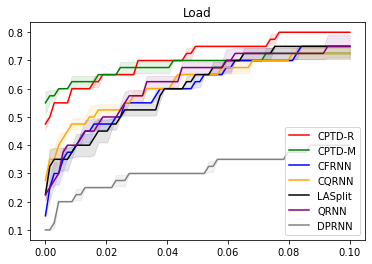

In [5]:
# The RESCALED TCR Table
reload(eval_utils)
def _tcr_str(key, d, pvals, p=0.01):
    ret = f"{d[key]['mean'] * 100:.2f}$\pm${d[key]['std'] * 100:.2f}"
    if pvals[key] >= p: ret = "\\textbf{%s}"%ret
    return ret
print("Tail Coverage Rate $\\uparrow$ & " + " & ".join(METHOD_MAP.get(m,m) for m in METHODS) + "\\\\")
for dataset in DATASETS:
    eval_utils.plot_coverage(covs2[dataset], perc=10, nx=N_TAILS[dataset], rename_cols=METHOD_MAP, title=DISPLAY_DATASETS_MAP[dataset])
    tcrs = eval_utils.compare_tail_coverage(covs2[dataset], tail_n=N_TAILS[dataset], quiet=True)
    _best_method = tcrs.drop(['QRNN', 'DPRNN'],axis=1,errors='ignore').mean().sort_values(ascending=False).index[0]
    pvals = {m: scipy.stats.ttest_ind(tcrs[m], tcrs[_best_method]).pvalue for m in tcrs.columns}
    #print(pvals)
    print(f"{DATASETS_MAP[dataset]} & " + " & ".join([_tcr_str(m, tcrs.describe(), pvals) for m in METHODS]) + "\\\\")